In [11]:
import sys
sys.path.append("../..")

import helper as hlp
import pandas as pd
import numpy as np

In [12]:
EPOCHS = 50
MAX_LEN = 30
N_CLASSES = 2
BATCH_SIZE = 256
LEARNING_RATE = 2e-5
NAME = 'distel(roberta)-english'
MODEL_NAME = 'distilroberta-base'
dir = '../../../Dataset Statistics/dataset'
path = f'../saved_models/{NAME}'

In [13]:
train_df = pd.read_csv(f'{dir}/train.csv')
val_df = pd.read_csv(f'{dir}/val.csv')
test_df = pd.read_csv(f'{dir}/test.csv')

train_texts = train_df['english_text'].values
val_texts = val_df['english_text'].values
test_texts = test_df['english_text'].values

train_labels = train_df['class'].values
val_labels = val_df['class'].values
test_labels = test_df['class'].values

In [15]:
#show 5 values along with their labels
for i in range(5):
    print(train_texts[i], train_labels[i])

Me an my nigga attitude soooooo bad but he always cave first cus he kno I stand on business literally 😂🤣 1
@khawarkhatana @ashoswai look at you with your hatred and jealousy you little Islamophobic POS, millions of Hindus live in Muslim nations, Jews have lived in peace with Muslims historically, even today they are welcome in many Muslim and Arab countries, this is not about religion, we are the same… https://t.co/NvrFlxZucP 1
@dartwalker @GraniteElements You must!
I dug this one out at Christmas - it had been in my sewing bag untouched for years 0
@EstherMcVey1 We look forward to hearing their response (to whatever question they will imagine you asked) 0
This is so amazing.  I am impressed with this project, hopefully with this event the community and especially this coin will achieve success., https://t.co/wB5RQb0EYJ 0


In [16]:
#show 5 values along with their labels
for i in range(5):
    print(hlp.preprocess_text(train_texts[i], language="urdu")
    , train_labels[i])

me an my nigga attitude soooooo bad but he always cave first cus he kno i stand on business literally 😂🤣 1
khawarkhatana ashoswai look at you with your hatred and jealousy you little islamophobic pos millions of hindus live in muslim nations jews have lived in peace with muslims historically even today they are welcome in many muslim and arab countries this is not about religion we are the same… 1
dartwalker graniteelements you must i dug this one out at christmas it had been in my sewing bag untouched for years 0
esthermcvey1 we look forward to hearing their response to whatever question they will imagine you asked 0
this is so amazing i am impressed with this project hopefully with this event the community and especially this coin will achieve success 0


In [17]:
## apply preprocessing to all texts
train_texts = [hlp.preprocess_text(text) for text in train_texts]
val_texts = [hlp.preprocess_text(text) for text in val_texts]
test_texts = [hlp.preprocess_text(text) for text in test_texts]

In [7]:
## mbert model and tokenizer
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
tokenizer = AutoTokenizer.from_pretrained("distilroberta-base")
model = AutoModelForSequenceClassification.from_pretrained("distilroberta-base", num_labels=N_CLASSES)
optimizer = torch.optim.AdamW(model.parameters(), lr=LEARNING_RATE)
model = model.to(device)

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at distilroberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [8]:
train_data_loader = hlp.create_data_loader(train_texts, train_labels, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = hlp.create_data_loader(val_texts, val_labels, tokenizer, MAX_LEN, BATCH_SIZE)

history = hlp.train_model(train_data_loader, val_data_loader, model, optimizer, device, EPOCHS, tokenizer, path)

Epoch 1/50
----------


Training Progress: 100%|██████████| 239/239 [01:22<00:00,  2.90it/s, loss=0.123] 


Train loss 0.14078480730838605 accuracy 0.9410706694136499
Validation loss 0.06760681823361665 accuracy 0.9764053762385951
Model and tokenizer saved at epoch 1
Checkpoint saved: Improved validation accuracy at epoch 1: 0.9764053762385951
Metrics logged at epoch 1
Epoch 2/50
----------


Training Progress: 100%|██████████| 239/239 [01:21<00:00,  2.95it/s, loss=0.0818]


Train loss 0.06319819580155686 accuracy 0.9770267176820694
Validation loss 0.06189087168313563 accuracy 0.9780241342097519
Model and tokenizer saved at epoch 2
Checkpoint saved: Improved validation accuracy at epoch 2: 0.9780241342097519
Metrics logged at epoch 2
Epoch 3/50
----------


Training Progress: 100%|██████████| 239/239 [01:21<00:00,  2.92it/s, loss=0.0877]


Train loss 0.05194349341078907 accuracy 0.9807057130710619
Validation loss 0.06409808057360351 accuracy 0.9764544295104484
No improvement in validation accuracy for 1 epochs.
Metrics logged at epoch 3
Epoch 4/50
----------


Training Progress: 100%|██████████| 239/239 [01:21<00:00,  2.95it/s, loss=0.0725]


Train loss 0.041300003042748536 accuracy 0.984793485725498
Validation loss 0.060080782906152305 accuracy 0.9781712940253116
Model and tokenizer saved at epoch 4
Checkpoint saved: Improved validation accuracy at epoch 4: 0.9781712940253116
Metrics logged at epoch 4
Epoch 5/50
----------


Training Progress: 100%|██████████| 239/239 [01:20<00:00,  2.96it/s, loss=0.0535] 


Train loss 0.03451455715911221 accuracy 0.9875077667680434
Validation loss 0.0630516630015336 accuracy 0.9786618267438438
Model and tokenizer saved at epoch 5
Checkpoint saved: Improved validation accuracy at epoch 5: 0.9786618267438438
Metrics logged at epoch 5
Epoch 6/50
----------


Training Progress: 100%|██████████| 239/239 [01:20<00:00,  2.97it/s, loss=0.0413] 


Train loss 0.028517187080077173 accuracy 0.9890938225579646
Validation loss 0.05972498672781512 accuracy 0.9802805847150006
Model and tokenizer saved at epoch 6
Checkpoint saved: Improved validation accuracy at epoch 6: 0.9802805847150006
Metrics logged at epoch 6
Epoch 7/50
----------


Training Progress: 100%|██████████| 239/239 [01:20<00:00,  2.98it/s, loss=0.0357] 


Train loss 0.025204410920675577 accuracy 0.9907125805291214
Validation loss 0.0751853063586168 accuracy 0.9795938389090553
No improvement in validation accuracy for 1 epochs.
Metrics logged at epoch 7
Epoch 8/50
----------


Training Progress: 100%|██████████| 239/239 [01:20<00:00,  2.95it/s, loss=0.0386] 


Train loss 0.02384758062045008 accuracy 0.9910396023414763
Validation loss 0.0674466524971649 accuracy 0.9809182772490925
Model and tokenizer saved at epoch 8
Checkpoint saved: Improved validation accuracy at epoch 8: 0.9809182772490925
Metrics logged at epoch 8
Epoch 9/50
----------


Training Progress: 100%|██████████| 239/239 [01:22<00:00,  2.91it/s, loss=0.0311] 


Train loss 0.018361033829879872 accuracy 0.993165244121783
Validation loss 0.07178417742252349 accuracy 0.9807711174335328
No improvement in validation accuracy for 1 epochs.
Metrics logged at epoch 9
Epoch 10/50
----------


Training Progress: 100%|██████████| 239/239 [01:20<00:00,  2.96it/s, loss=0.0268]  


Train loss 0.014215747968763284 accuracy 0.9944896824618202
Validation loss 0.08003126877592877 accuracy 0.9796919454527617
No improvement in validation accuracy for 2 epochs.
Metrics logged at epoch 10
Epoch 11/50
----------


Training Progress: 100%|██████████| 239/239 [04:06<00:00,  1.03s/it, loss=0.012]   


Train loss 0.012997519545146035 accuracy 0.9949965662709703
Validation loss 0.08167207523947581 accuracy 0.9786618267438438
No improvement in validation accuracy for 3 epochs.
Metrics logged at epoch 11
Epoch 12/50
----------


Training Progress: 100%|██████████| 239/239 [04:07<00:00,  1.04s/it, loss=0.0123]  


Train loss 0.010863987964523905 accuracy 0.9956996631675333
Validation loss 0.08955539902672172 accuracy 0.980378691258707
No improvement in validation accuracy for 4 epochs.
Metrics logged at epoch 12
Epoch 13/50
----------


Training Progress: 100%|██████████| 239/239 [02:55<00:00,  1.36it/s, loss=0.0143]  


Train loss 0.008290430131002046 accuracy 0.9967951862389222
Validation loss 0.10166978273191489 accuracy 0.9791523594623762
No improvement in validation accuracy for 5 epochs.
Stopping early due to lack of improvement in validation accuracy.


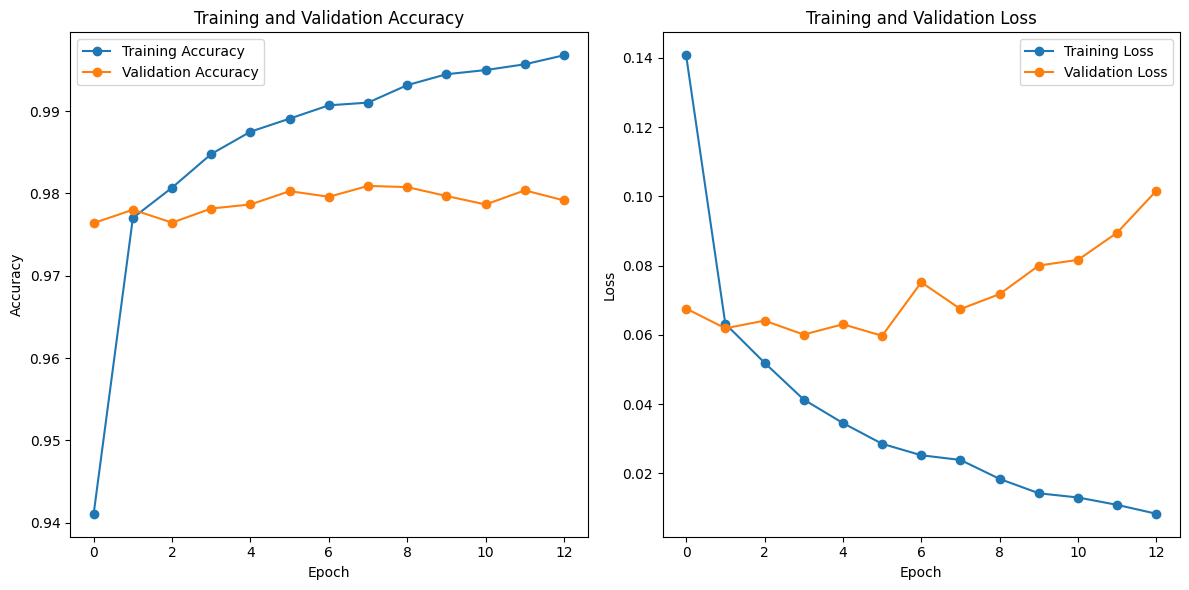

In [9]:
hlp.plot_history(history)

In [19]:
import os
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

def extract_epoch_number(dir):
    files = os.listdir(dir)
    epoch = 0
    for file in files:
        if 'model_epoch' in file:
            epoch = max(epoch, int(file.split('_')[-1]))
    return epoch

path = f'../saved_models/{NAME}'
epoch = extract_epoch_number(path)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
tokenizer = AutoTokenizer.from_pretrained(f'{path}/tokenizer')
model = AutoModelForSequenceClassification.from_pretrained(f'{path}/model_epoch_{epoch}', num_labels=N_CLASSES)
optimizer = torch.optim.AdamW(model.parameters(), lr=LEARNING_RATE)
model = model.to(device)

In [20]:
test_data_loader = hlp.create_data_loader(test_texts, test_labels, tokenizer, MAX_LEN, BATCH_SIZE)

test_acc, test_loss, test_label_actual, test_label_pred = hlp.eval_model(model, test_data_loader, device)

print(f'Test Accuracy: {test_acc} Test Loss: {test_loss}')

Test Accuracy: 0.9795457889831756 Test Loss: 0.06866597252665088


Accuracy: 0.98
F1 Score: 0.98
Precision: 0.98
Recall: 0.98

Classification Report:
              precision    recall  f1-score   support

    Non-Hate       0.98      0.98      0.98     10196
        Hate       0.98      0.98      0.98     10191

    accuracy                           0.98     20387
   macro avg       0.98      0.98      0.98     20387
weighted avg       0.98      0.98      0.98     20387



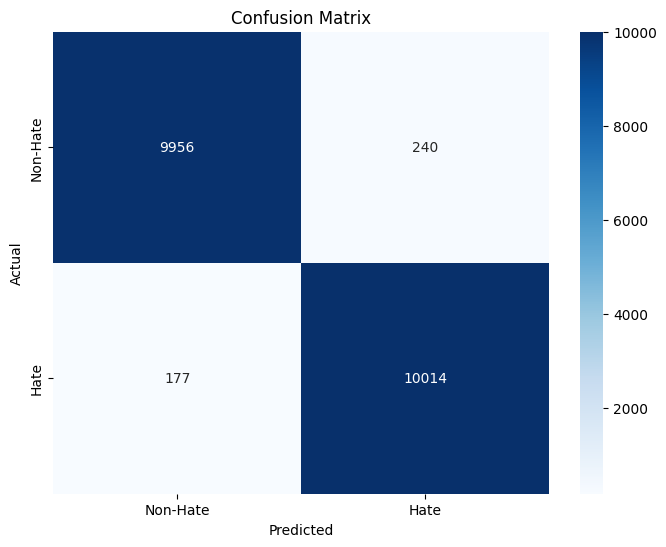

In [21]:
hlp.plot_confusion_matrix(test_label_actual, test_label_pred, ['Non-Hate', 'Hate'])

In [22]:
test_texts = ["This is the sort of thing that happens in a shithole country. @URL"]
preds, confidence = hlp.predict(test_texts, model, tokenizer, MAX_LEN, device)

if preds[0] == 1:
    print(f'Predicted class: Hate Speech \nConfidence: {confidence[0][1]:.2f}')
else:
    print(f'Predicted class: Not Hate Speech \nConfidence: {confidence[0][0]:.2f}')

Predicted class: Hate Speech 
Confidence: 0.90
